# Data Collection
In this section, I used the `yfinance` library to download historical stock data for Apple Inc. (`AAPL`). The data is retrieved for the period from January 1, 2020, to September 1, 2023. We then display the first few rows of the dataset to get an overview of the data structure.

In [2]:
#Installing Yfinance library
pip install yfinance



  Using cached yfinance-0.2.43-py2.py3-none-any.whl.metadata (11 kB)
  Using cached pandas-2.2.2-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached peewee-3.17.6.tar.gz (3.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached yfinance-0.2.43-py2.py3-none-any.whl (84 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   -- --------------------------

In [1]:
pip show yfinance


Name: yfinance
Version: 0.2.43
Summary: Download market data from Yahoo! Finance API
Home-page: https://github.com/ranaroussi/yfinance
Author: Ran Aroussi
Author-email: ran@aroussi.com
License: Apache
Location: c:\users\nidhi\tf_env\lib\site-packages
Requires: beautifulsoup4, frozendict, html5lib, lxml, multitasking, numpy, pandas, peewee, platformdirs, pytz, requests
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import Libraries
import yfinance as yf
import pandas as pd

# Define the stock symbol and the period for which you want the data
stock_symbol = 'AAPL'  # Apple Inc.
start_date = '2020-01-01'
end_date = '2023-09-01'

# Download the stock data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Display the first few rows
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876114  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167603  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742653  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400558  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565208  132079200


##  Data Preprocessing and Visualization



In this section, I prepared the stock data for further analysis. We handle any missing values and create visualizations to understand the stock's price movements better.

In [55]:
# Handle missing data (if any)
stock_data = stock_data.dropna()
stock_data

,Open,High,Low,Close,Adj Close,Volume,Next Close,SMA_10,SMA_20,EMA_10,EMA_20,RSI,Lag_1,Lag_2
Date,,,,,,,,,,,,,,
2020-02-03,76.074997,78.372498,75.555000,77.165001,74.892418,173788400,79.712502,79.120751,78.264000,78.707110,78.190593,42.987505,77.377502,80.967499
2020-02-04,78.827499,79.910004,78.407501,79.712502,77.364899,136616400,80.362503,79.177751,78.502126,78.889908,78.335537,54.739602,77.165001,77.377502
2020-02-05,80.879997,81.190002,79.737503,80.362503,77.995773,118826800,81.302498,79.271501,78.790376,79.157653,78.528581,57.618700,79.712502,77.165001
2020-02-06,80.642502,81.305000,80.065002,81.302498,78.908073,105425600,80.007500,79.421001,79.065625,79.547625,78.792764,57.529076,80.362503,79.712502
2020-02-07,80.592499,80.849998,79.500000,80.007500,77.835495,117684000,80.387497,79.464001,79.195625,79.631238,78.908453,50.957282,81.302498,80.362503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-24,180.669998,181.100006,176.009995,176.380005,175.482056,54945800,178.610001,177.033000,181.938501,178.102173,180.778034,38.820251,181.119995,177.229996
2023-08-25,177.380005,179.149994,175.820007,178.610001,177.700699,51449600,180.190002,177.115001,181.077501,178.194505,180.571555,49.503711,176.380005,181.119995
2023-08-28,180.089996,180.589996,178.550003,180.190002,179.272659,43820700,184.119995,177.188000,180.264501,178.557323,180.535216,50.785972,178.610001,176.380005


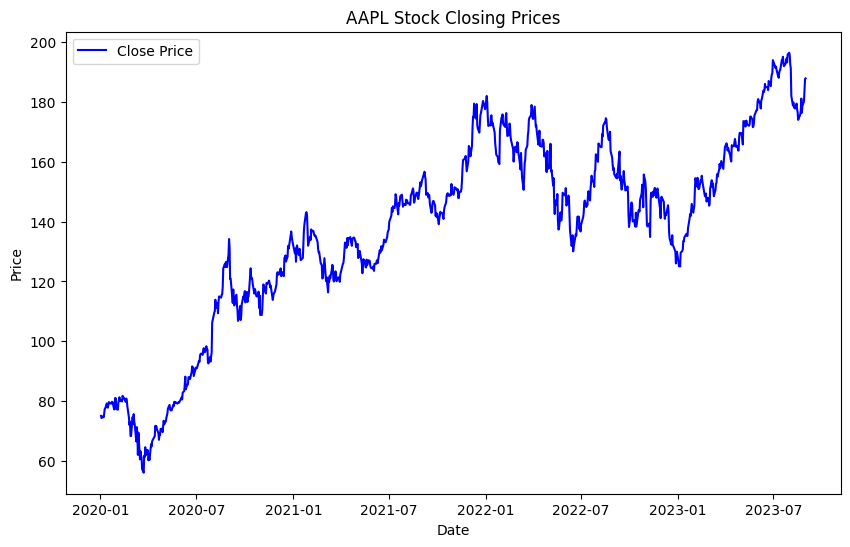

In [3]:
import matplotlib.pyplot as plt

# Visualization 1: Stock Price Overview 
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.title(f"{stock_symbol} Stock Closing Prices")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Feature Engineering: Creating Next Day's Closing Price

In this step, I created a new feature in the dataset, which represents the closing price of the next day. This feature will serve as the target variable for our prediction model. We also remove the last row of the dataset, as it does not have a corresponding next day's closing price.


In [4]:
# Created a new column for the next day's closing price (we'll predict this)
stock_data['Next Close'] = stock_data['Close'].shift(-1)

# Drop the last row since it doesn't have a 'Next Close' value
stock_data = stock_data[:-1]

# Display the modified data
print(stock_data.head())

                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876114  135480400   
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167603  146322800   
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742653  118387200   
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400558  108872000   
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565208  132079200   

            Next Close  
Date                    
2020-01-02   74.357498  
2020-01-03   74.949997  
2020-01-06   74.597504  
2020-01-07   75.797501  
2020-01-08   77.407501  


## Model Building

We'll start with a simple Linear Regression model to predict the next day's closing price based on the current day's closing price.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Features (current day's closing price)
X = stock_data[['Close']]

# Target (next day's closing price)
y = stock_data['Next Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

### Save the model

In [6]:
import joblib

# Save the model
model_filename = 'stock_price_model_simple.pkl'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to stock_price_model_simple.pkl


In [7]:
import joblib
model = joblib.load('stock_price_model_simple.pkl')


## Model Evaluation



### Make Predictions and Calculate Metrics

Using the trained model to make predictions on the test set and then calculate performance metrics to assess the model's accuracy.

In [115]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared (R²): {lr_r2}')

6/6 [==============================] - 0s 12ms/step
Mean Squared Error: 0.0007231448806693742
Mean Absolute Error: 0.02207393089328146
R-squared (R²): 0.9593786414362027


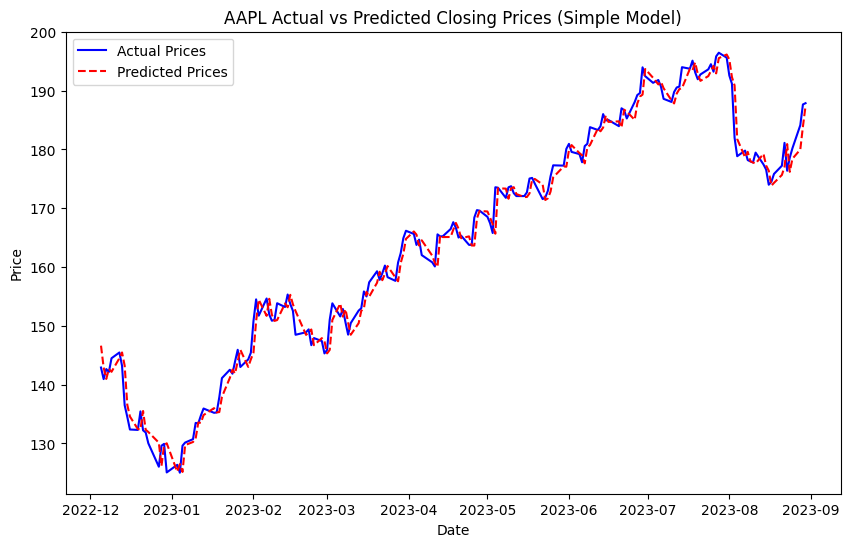

In [9]:
# Visualization 2: Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(X_test.index, y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title(f"{stock_symbol} Actual vs Predicted Closing Prices (Simple Model)")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#visual comparison of model performance.

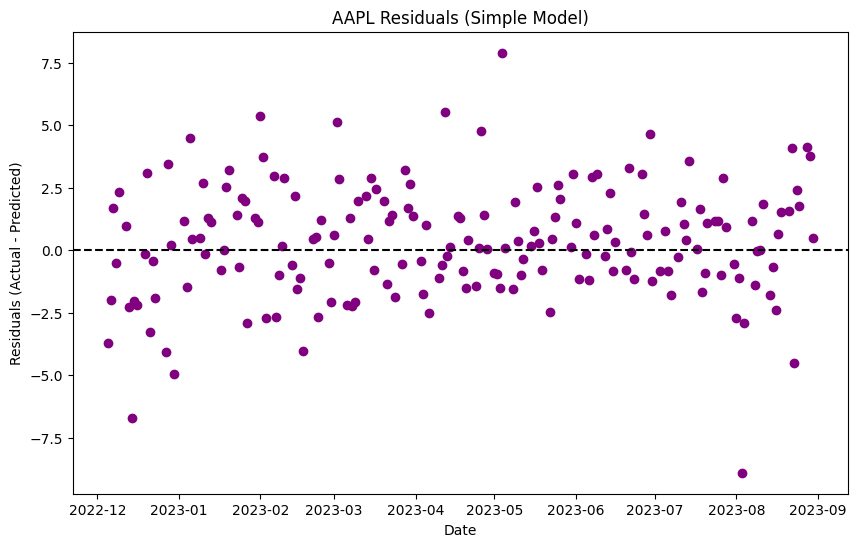

In [10]:
# Visualization 3: Residual Plot (to identify any patterns or biases in the residuals)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(X_test.index, residuals, color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title(f"{stock_symbol} Residuals (Simple Model)")
plt.xlabel('Date')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

## Model Prediction


We can now evaluate how well our model predicts the next day's closing price.


In [11]:
# Predict the next day's closing price based on the latest available data
latest_close = X.iloc[-1].values.reshape(1, -1)
predicted_next_close = model.predict(latest_close)

print(f"Predicted next day's closing price: {predicted_next_close[0]}")

Predicted next day's closing price: 187.39948703820446


C:\Users\NIDHI\tf_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Actual closing price

In [57]:
#  the latest actual closing price
latest_actual_close = stock_data['Close'].iloc[-1]
latest_actual_close

187.64999389648438

## Calculate Technical Indicators

I'll start by adding some commonly used technical indicators:

Moving Averages: I'll calculate both the Simple Moving Average (SMA) and the Exponential Moving Average (EMA).
Relative Strength Index (RSI): This indicator measures the magnitude of recent price changes to evaluate overbought or oversold conditions.

In [13]:
import numpy as np

# Simple Moving Average (SMA)
stock_data['SMA_10'] = stock_data['Close'].rolling(window=10).mean()
stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()

# Exponential Moving Average (EMA)
stock_data['EMA_10'] = stock_data['Close'].ewm(span=10, adjust=False).mean()
stock_data['EMA_20'] = stock_data['Close'].ewm(span=20, adjust=False).mean()

# Relative Strength Index (RSI)
delta = stock_data['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
average_gain = gain.rolling(window=14).mean()
average_loss = loss.rolling(window=14).mean()
rs = average_gain / average_loss
stock_data['RSI'] = 100 - (100 / (1 + rs))

# Drop rows with NaN values after calculating the indicators
rows_before = stock_data.shape[0]
stock_data = stock_data.dropna()
rows_after = stock_data.shape[0]
rows_dropped = rows_before - rows_after

print(f"Rows before dropping NaNs: {rows_before}, Rows after: {rows_after}, Rows dropped: {rows_dropped}")

# Display the updated data with new features
print(stock_data.head())


Rows before dropping NaNs: 922, Rows after: 903, Rows dropped: 19
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2020-01-30  80.135002  81.022499  79.687500  80.967499  78.582947  126743200   
2020-01-31  80.232498  80.669998  77.072502  77.377502  75.098671  199588400   
2020-02-03  76.074997  78.372498  75.555000  77.165001  74.892418  173788400   
2020-02-04  78.827499  79.910004  78.407501  79.712502  77.364899  136616400   
2020-02-05  80.879997  81.190002  79.737503  80.362503  77.995773  118826800   

            Next Close     SMA_10     SMA_20     EMA_10     EMA_20        RSI  
Date                                                                           
2020-01-30   77.377502  79.515751  78.009125  79.421423  78.395502  63.879136  
2020-01-31   77.165001  79.372501  78.123625  79.049801  78.298550  49.368860  
2020-02-03   79.712502  79.120751  78.264000  78.7071

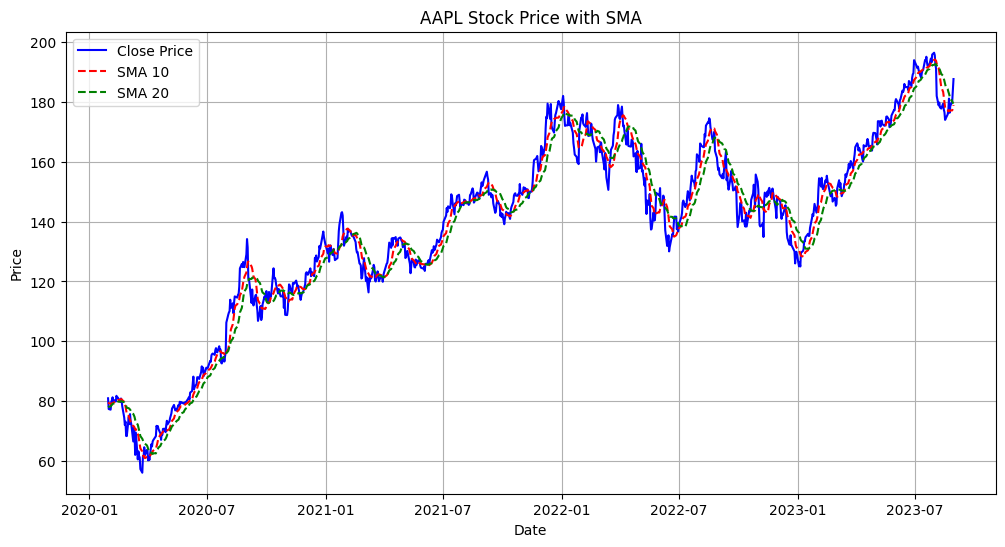

In [14]:
#  Stock Price with Simple Moving Averages (SMA)
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data['SMA_10'], label='SMA 10', color='red', linestyle='--')
plt.plot(stock_data['SMA_20'], label='SMA 20', color='green', linestyle='--')
plt.title(f"{stock_symbol} Stock Price with SMA")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

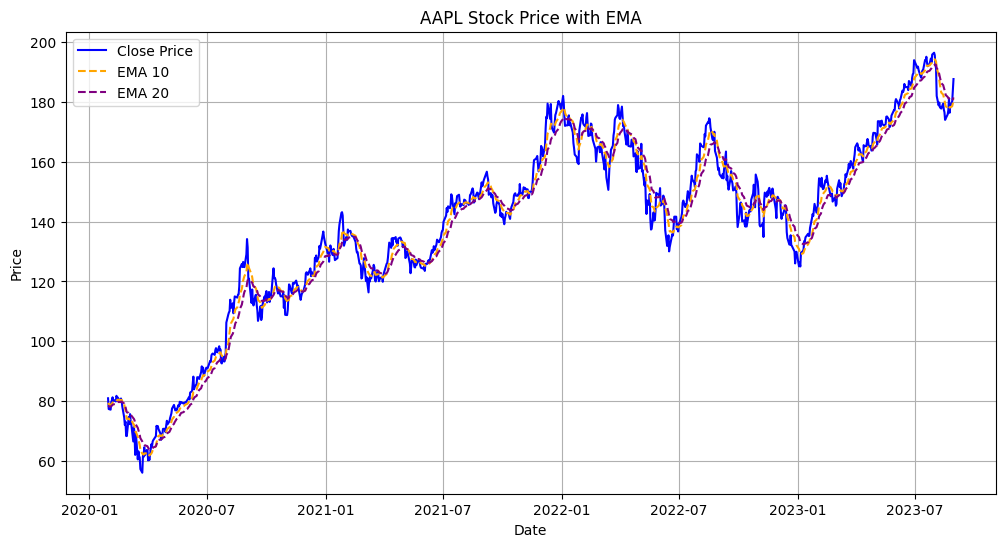

In [15]:
# Stock Price with Exponential Moving Averages (EMA)
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data['EMA_10'], label='EMA 10', color='orange', linestyle='--')
plt.plot(stock_data['EMA_20'], label='EMA 20', color='purple', linestyle='--')
plt.title(f"{stock_symbol} Stock Price with EMA")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

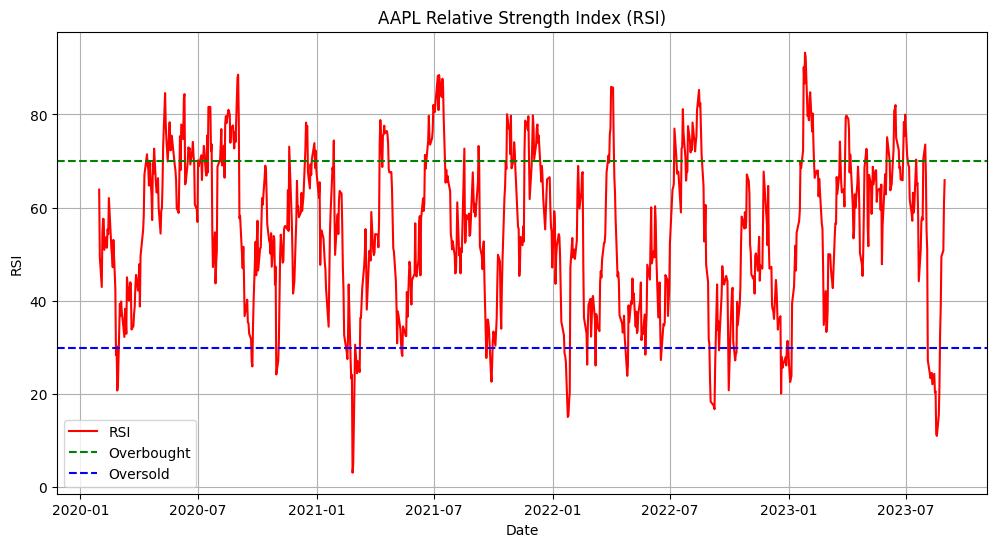

In [16]:
#  Relative Strength Index (RSI)
plt.figure(figsize=(12, 6))
plt.plot(stock_data['RSI'], label='RSI', color='red')
plt.axhline(70, color='green', linestyle='--', label='Overbought')
plt.axhline(30, color='blue', linestyle='--', label='Oversold')
plt.title(f"{stock_symbol} Relative Strength Index (RSI)")
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

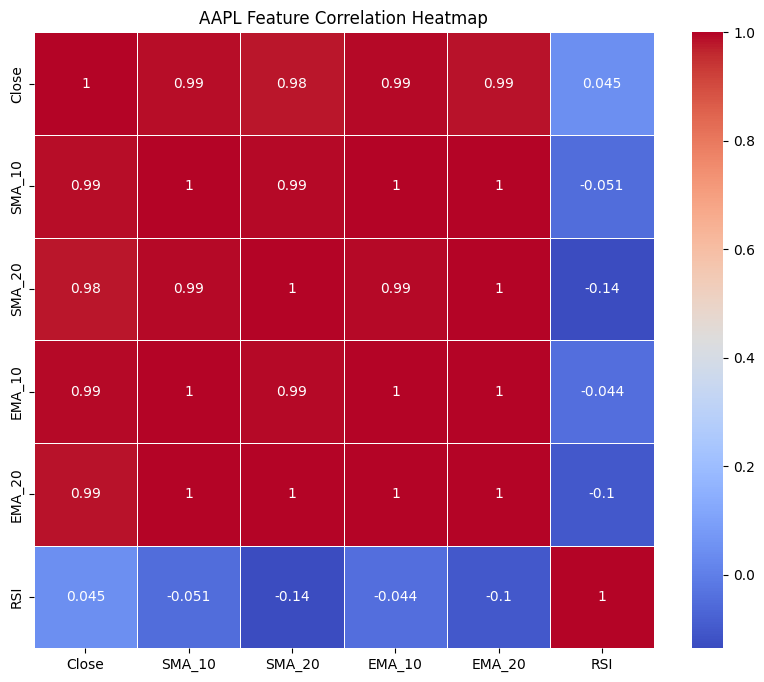

In [17]:
import seaborn as sns


#  Feature Correlation Heatmap
correlation_matrix = stock_data[['Close', 'SMA_10', 'SMA_20', 'EMA_10', 'EMA_20', 'RSI']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f"{stock_symbol} Feature Correlation Heatmap")
plt.show()

Correlation Heatmap:

High Correlation: Features like SMA and EMA are highly correlated with each other and the closing price due to their derivation from the same data.
RSI: Shows lower correlation with other features, reflecting its different focus on momentum rather than price trends.

<Figure size 1200x1000 with 0 Axes>

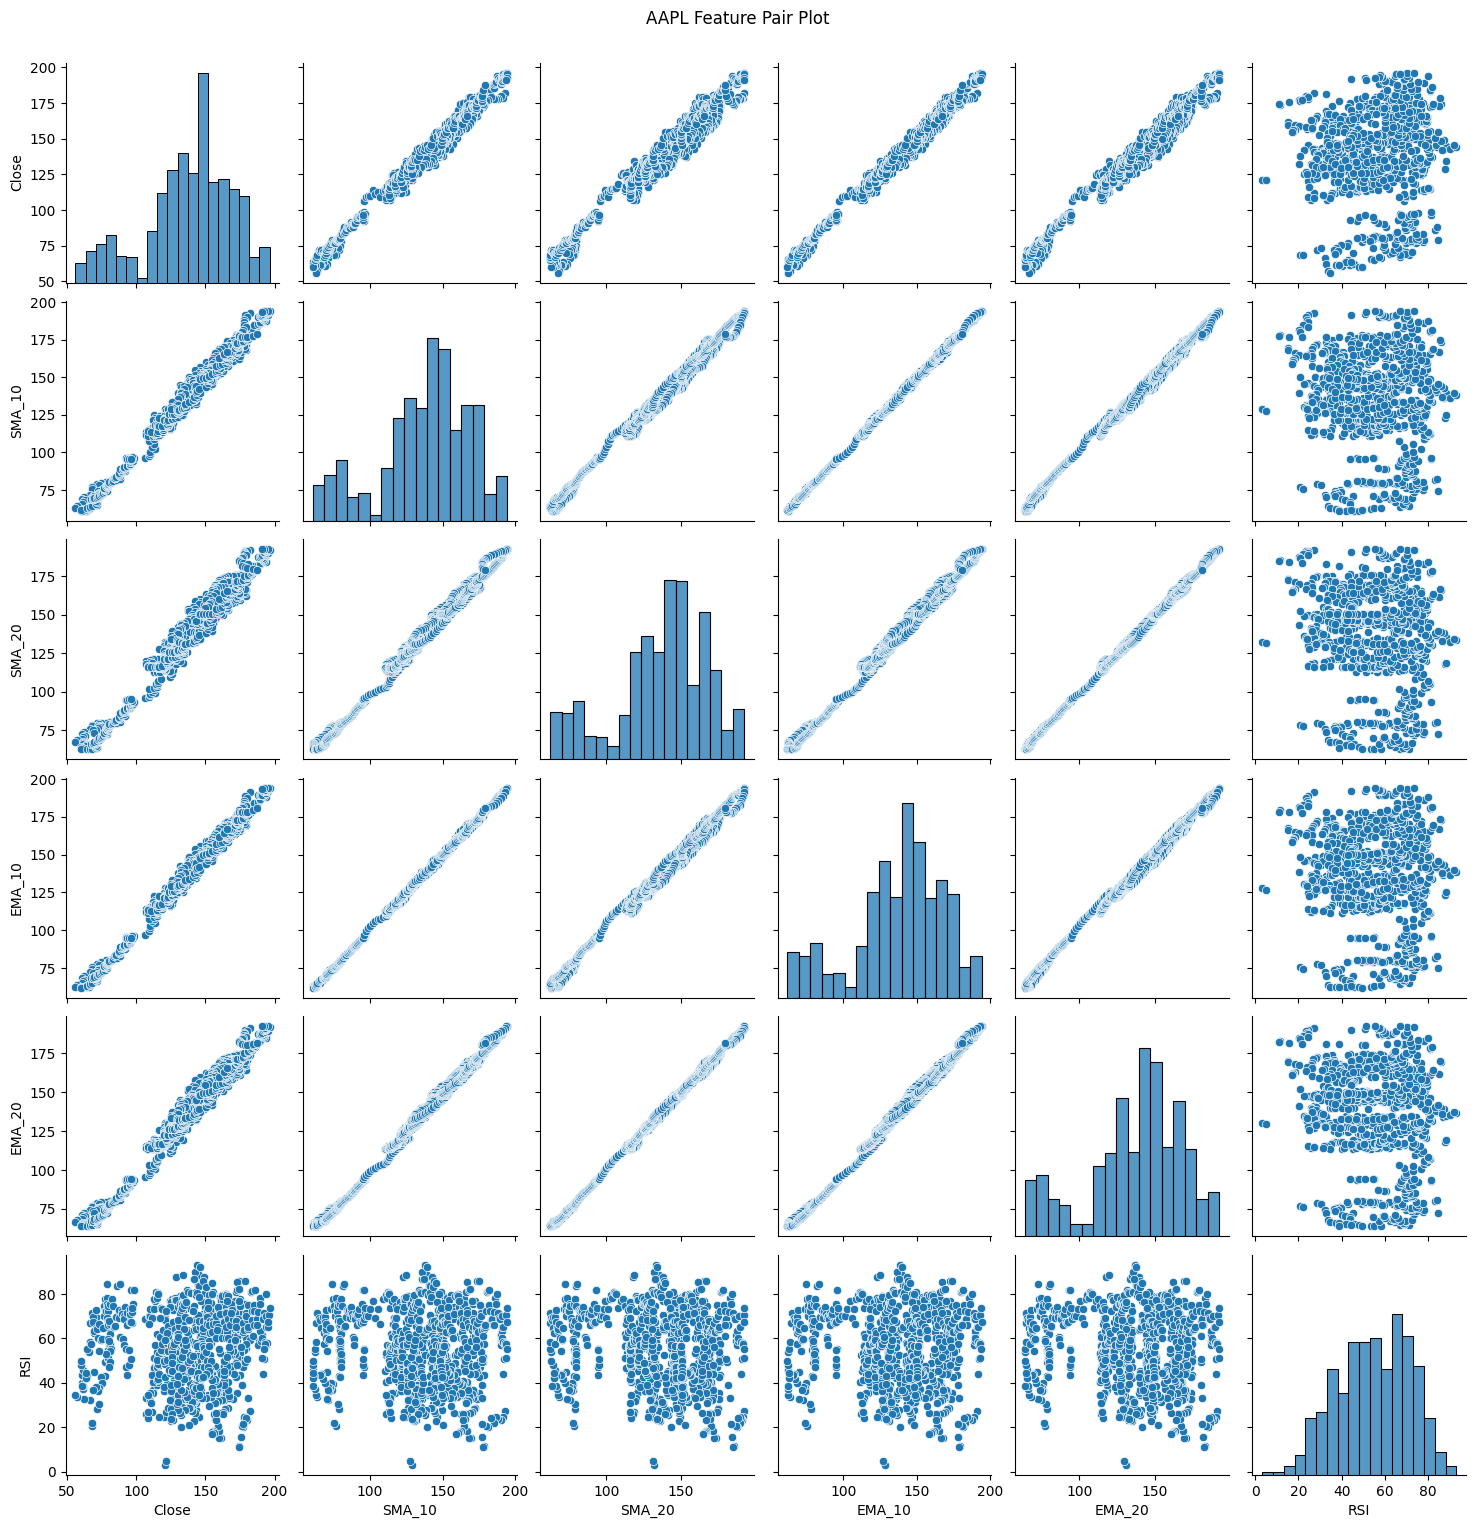

In [18]:
import seaborn as sns

# Visualize pairwise relationships in the dataset
plt.figure(figsize=(12, 10))
sns.pairplot(stock_data[['Close', 'SMA_10', 'SMA_20', 'EMA_10', 'EMA_20', 'RSI']])
plt.suptitle(f"{stock_symbol} Feature Pair Plot", y=1.02)
plt.show()


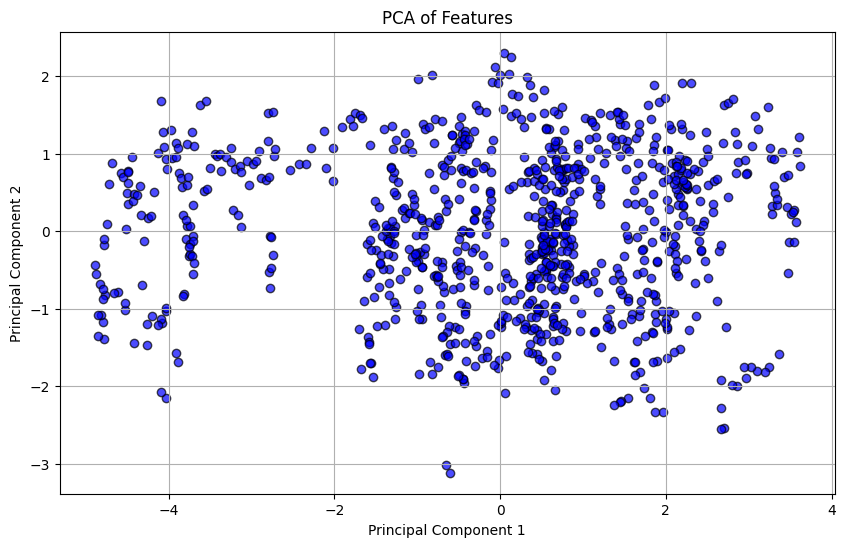

Explained variance ratio for PC1: 0.80
Explained variance ratio for PC2: 0.20


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Remove highly correlated features (example: drop 'SMA_20')
features = stock_data[['Close', 'SMA_10', 'EMA_10', 'EMA_20', 'RSI']]

# Standardize the features before PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_features = pca.fit_transform(scaled_features)

# Convert PCA results to DataFrame
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', edgecolor='k', alpha=0.7)
plt.title("PCA of Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# Print explained variance ratio
print(f"Explained variance ratio for PC1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"Explained variance ratio for PC2: {pca.explained_variance_ratio_[1]:.2f}")


## Feature Importance and Selection Using Random Forest

Random Forest Regressor to evaluate the importance of different features in predicting the next day's closing price, then selecting the most important features based on their importance scores.


In [65]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Example feature set
features = stock_data[['Close', 'SMA_10', 'SMA_20', 'EMA_10', 'EMA_20', 'RSI']]
target = stock_data['Next Close']

# Feature Importance-Based Selection
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(features, target)
importances = rf_model.feature_importances_
feature_names = features.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print("Feature Importances:")
print(importance_df)


Feature Importances:
  Feature  Importance
0   Close    0.886837
1  SMA_10    0.002632
2  SMA_20    0.046948
3  EMA_10    0.013961
4  EMA_20    0.048238
5     RSI    0.001385


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# RFE
lr_model = LinearRegression()
rfe = RFE(lr_model, n_features_to_select=3)
rfe = rfe.fit(features, target)
selected_features_rfe = features.columns[rfe.support_]
print("Selected features using RFE:", selected_features_rfe)

Selected features using RFE: Index(['Close', 'SMA_20', 'EMA_20'], dtype='object')


In [67]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[selected_features_rfe])

# Apply PCA
pca = PCA(n_components=3)
pca_features = pca.fit_transform(scaled_features)

# Convert PCA results to DataFrame
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2', 'PC3'])
print(pca_df.head())



        PC1       PC2       PC3
0 -3.338255 -0.057587  0.001434
1 -3.284000  0.003430 -0.009548
2 -3.262994  0.013784 -0.013223
3 -3.235534  0.031200 -0.015977
4 -3.254890 -0.005740 -0.010937


In [68]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Example feature set
features = stock_data[['Close', 'SMA_10', 'SMA_20', 'EMA_10', 'EMA_20', 'RSI']]
target = stock_data['Next Close']

# Feature Importance-Based Selection
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(features, target)
importances = rf_model.feature_importances_
feature_names = features.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print("Feature Importances:")
print(importance_df)

# RFE
lr_model = LinearRegression()
rfe = RFE(lr_model, n_features_to_select=3)
rfe = rfe.fit(features, target)
selected_features_rfe = features.columns[rfe.support_]
print("Selected features using RFE:", selected_features_rfe)

# Standardize and apply PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[selected_features_rfe])

pca = PCA(n_components=3)
pca_features = pca.fit_transform(scaled_features)

# Convert PCA results to DataFrame
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2', 'PC3'])
print(pca_df.head())


Feature Importances:
  Feature  Importance
0   Close    0.886837
1  SMA_10    0.002632
2  SMA_20    0.046948
3  EMA_10    0.013961
4  EMA_20    0.048238
5     RSI    0.001385
Selected features using RFE: Index(['Close', 'SMA_20', 'EMA_20'], dtype='object')
        PC1       PC2       PC3
0 -3.338255 -0.057587  0.001434
1 -3.284000  0.003430 -0.009548
2 -3.262994  0.013784 -0.013223
3 -3.235534  0.031200 -0.015977
4 -3.254890 -0.005740 -0.010937


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split data for selected features
X_selected_train, X_selected_test, y_train, y_test = train_test_split(
    features[['Close', 'SMA_20', 'EMA_20']], target, test_size=0.2, shuffle=False
)

# Split data for PCA components
X_pca_train, X_pca_test, y_train, y_test = train_test_split(
    pca_df, target, test_size=0.2, shuffle=False
)



# Train a model with selected features
model_selected = LinearRegression()
model_selected.fit(X_selected_train, y_train)

# Predict and evaluate
y_pred_selected = model_selected.predict(X_selected_test)
mse_selected = mean_squared_error(y_test, y_pred_selected)
mae_selected = mean_absolute_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f'Selected Features Model Mean Squared Error: {mse_selected}')
print(f'Selected Features Model Mean Absolute Error: {mae_selected}')
print(f'Selected Features Model R-squared (R²): {r2_selected}')


Selected Features Model Mean Squared Error: 5.235314596940403
Selected Features Model Mean Absolute Error: 1.756222188657156
Selected Features Model R-squared (R²): 0.9863983908560201


In [69]:
# Use PCA features for modeling
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(pca_df, target, test_size=0.2, shuffle=False)

# Train a model with PCA features
pca_model = LinearRegression()
pca_model.fit(X_pca_train, y_pca_train)

# Predict and evaluate
pca_y_pred = pca_model.predict(X_pca_test)
pca_mse = mean_squared_error(y_pca_test, pca_y_pred)
pca_mae = mean_absolute_error(y_pca_test, pca_y_pred)
pca_r2 = r2_score(y_pca_test, pca_y_pred)

print(f'PCA Model Mean Squared Error: {pca_mse}')
print(f'PCA Model Mean Absolute Error: {pca_mae}')
print(f'PCA Model R-squared (R²): {pca_r2}')


PCA Model Mean Squared Error: 5.2353145969403885
PCA Model Mean Absolute Error: 1.756222188657154
PCA Model R-squared (R²): 0.9863983908560201


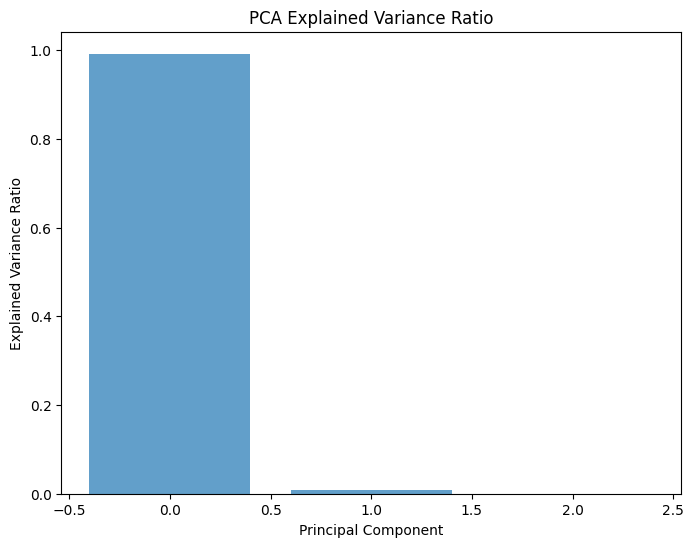

In [70]:
import matplotlib.pyplot as plt

# Plot explained variance ratio of each principal component
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.show()


In [23]:
# Explained variance ratio
print("Explained variance ratio by component:", pca.explained_variance_ratio_)

Explained variance ratio by component: [0.82945673 0.16915804 0.00090862]


In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define features and target
features = stock_data[['Close', 'SMA_10', 'SMA_20', 'EMA_10', 'EMA_20', 'RSI']]
target = stock_data['Next Close']

# Initialize and train Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(features, target)

# Hyperparameter tuning
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(features, target)

# Best model and parameters
best_rf_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 10, 'n_estimators': 100}


In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict using the best model
y_pred = best_rf_model.predict(features)

# Evaluate the model
mse = mean_squared_error(target, y_pred)
mae = mean_absolute_error(target, y_pred)
best_r2 = r2_score(target, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {best_r2}")


Mean Squared Error: 1.6014578148630407
Mean Absolute Error: 0.9814097778877531
R-squared: 0.9983425698338798


Evaluates the model on the entire dataset.
Does not include a train-test split, potentially leading to overestimation of model performance.

In [86]:
#Evaluation with train-test split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate performance
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Model Performance:")
print(f"Mean Squared Error: {rf_mse}")
print(f"Mean Absolute Error: {rf_mae}")
print(f"R-squared (R²): {rf_r2}")


Random Forest Model Performance:
Mean Squared Error: 34.117200049791265
Mean Absolute Error: 4.00025843594749
R-squared (R²): 0.9113618080496195


In [96]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data[['Close']])

# Create sequences for LSTM
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Define sequence length
SEQ_LENGTH = 60
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split data into training and test sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Initialize and train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, max_depth=10)
xgb_model.fit(X_train.reshape((X_train.shape[0], -1)), y_train)  # Flatten the sequence data

# Evaluate XGBoost model performance
xgb_predictions = xgb_model.predict(X_test.reshape((X_test.shape[0], -1)))  # Flatten the sequence data
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print("XGBoost Model Performance:")
print(f"Mean Squared Error: {xgb_mse}")
print(f"Mean Absolute Error: {xgb_mae}")
print(f"R-squared (R²): {xgb_r2}")


XGBoost Model Performance:
Mean Squared Error: 0.004474621652073516
Mean Absolute Error: 0.04605260441110758
R-squared (R²): 0.7486462043429529


Epoch 1/10
21/21 [==============================] - 3s 22ms/step - loss: 0.0478
Epoch 2/10
21/21 [==============================] - 1s 30ms/step - loss: 0.0045
Epoch 3/10
21/21 [==============================] - 1s 27ms/step - loss: 0.0029
Epoch 4/10
21/21 [==============================] - 1s 25ms/step - loss: 0.0024
Epoch 5/10
21/21 [==============================] - 1s 26ms/step - loss: 0.0023
Epoch 6/10
21/21 [==============================] - 1s 26ms/step - loss: 0.0021
Epoch 7/10
21/21 [==============================] - 1s 25ms/step - loss: 0.0020
Epoch 8/10
21/21 [==============================] - 0s 23ms/step - loss: 0.0021
Epoch 9/10
21/21 [==============================] - 1s 27ms/step - loss: 0.0019
Epoch 10/10
6/6 [==============================] - 1s 8ms/step
LSTM Model Performance:
Mean Squared Error: 49.94619527273672
Mean Absolute Error: 6.339901670196353
R-squared (R²): 0.8575835789270385


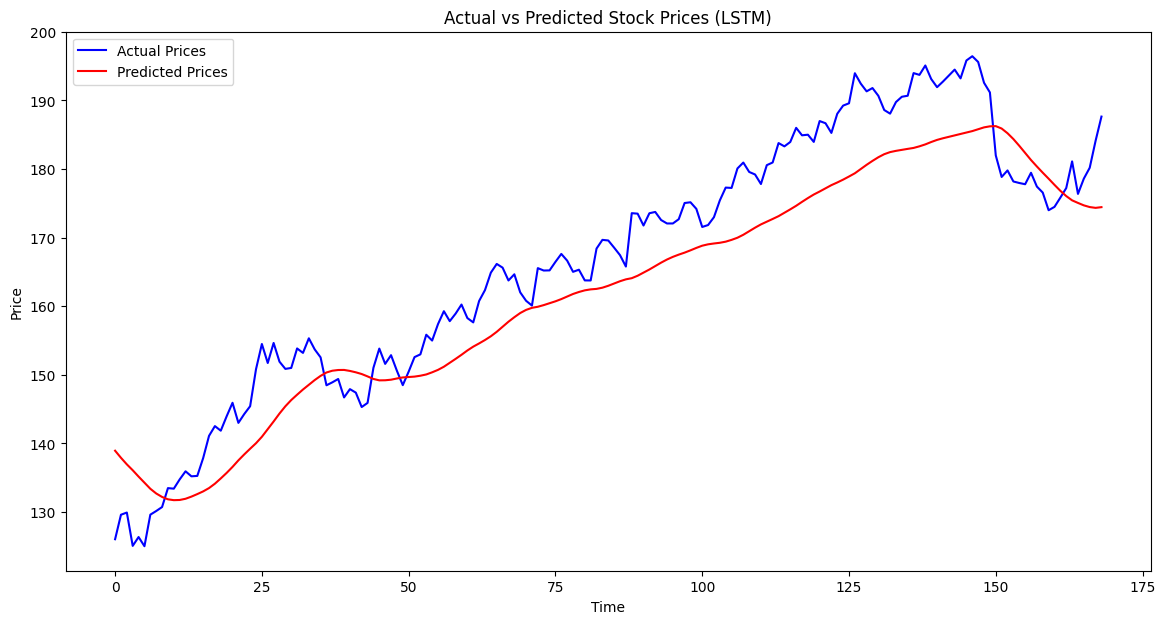

In [97]:
# Define and train LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions with the LSTM model
lstm_predictions = lstm_model.predict(X_test)

# Inverse transform predictions and actual values
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
lstm_predictions_inv = scaler.inverse_transform(lstm_predictions)

# Calculate and print LSTM performance metrics
lstm_mse = mean_squared_error(y_test_inv, lstm_predictions_inv)
lstm_mae = mean_absolute_error(y_test_inv, lstm_predictions_inv)
lstm_r2 = r2_score(y_test, lstm_predictions)

print("LSTM Model Performance:")
print(f"Mean Squared Error: {lstm_mse}")
print(f"Mean Absolute Error: {lstm_mae}")
print(f"R-squared (R²): {lstm_r2}")

# Plot predictions vs actual values for LSTM
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test_inv)), y_test_inv, label='Actual Prices', color='blue')
plt.plot(range(len(lstm_predictions_inv)), lstm_predictions_inv, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Stock Prices (LSTM)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


train-test split to better assess model generalization.

In [90]:
from xgboost import XGBRegressor

# Initialize and train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, max_depth=10)
xgb_model.fit(features, target)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [98]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data[['Close']])

# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Define sequence length
SEQ_LENGTH = 60  # Number of past days to consider

X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split data into training and test sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))



In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/10
19/19 [==============================] - 4s 75ms/step - loss: 0.0232 - val_loss: 0.0023
Epoch 2/10
19/19 [==============================] - 1s 31ms/step - loss: 0.0040 - val_loss: 0.0026
Epoch 3/10
19/19 [==============================] - 1s 27ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 4/10
19/19 [==============================] - 1s 30ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 5/10
19/19 [==============================] - 1s 37ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 6/10
19/19 [==============================] - 1s 37ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 7/10
19/19 [==============================] - 1s 33ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 8/10
19/19 [==============================] - 1s 30ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 9/10
19/19 [==============================] - 1s 30ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 10/10
19/19 [==============================] - 1s 32ms/step - loss: 0.0015 - val_loss: 0.0017


In [101]:
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Calculate and print performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2=r2_score(y_test_inv, y_pred_inv)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared (R²): {r2}')

6/6 [==============================] - 0s 9ms/step
Mean Squared Error: 32.48850561066265
Mean Absolute Error: 5.0969383194601745
R-squared (R²): 0.9073623293055072


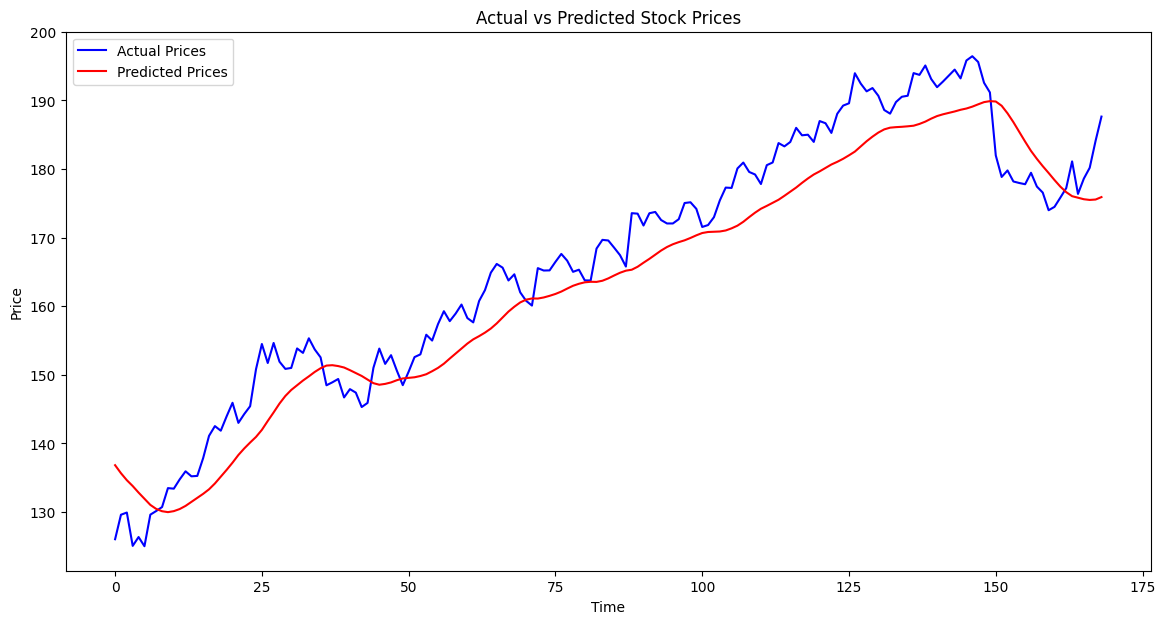

In [102]:
# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test_inv)), y_test_inv, label='Actual Prices', color='blue')
plt.plot(range(len(y_pred_inv)), y_pred_inv, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [119]:
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 1))))

model.add(LSTM(50, return_sequences=False))

model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks = [early_stopping], verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Calculate and print performance metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
bwd_r2 = r2_score(y_test_inv, y_pred_inv)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared (R²): {bwd_r2}')

Epoch 1/100
19/19 [==============================] - 6s 82ms/step - loss: 0.0335 - val_loss: 0.0015
Epoch 2/100
19/19 [==============================] - 1s 35ms/step - loss: 0.0030 - val_loss: 0.0014
Epoch 3/100
19/19 [==============================] - 1s 36ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 4/100
19/19 [==============================] - 1s 36ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 5/100
19/19 [==============================] - 1s 36ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 6/100
19/19 [==============================] - 1s 39ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 7/100
19/19 [==============================] - 1s 46ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 8/100
19/19 [==============================] - 1s 44ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 9/100
19/19 [==============================] - 1s 43ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 10/100
19/19 [==============================] - 1s 42ms/step - loss: 0.0012 - val_loss: 0.0016

19/19 [==============================] - 1s 35ms/step - loss: 5.6603e-04 - val_loss: 8.6469e-04
Epoch 80/100
19/19 [==============================] - 1s 40ms/step - loss: 5.6215e-04 - val_loss: 0.0017
Epoch 81/100
19/19 [==============================] - 1s 41ms/step - loss: 6.4124e-04 - val_loss: 8.4874e-04
Epoch 82/100
19/19 [==============================] - 1s 37ms/step - loss: 6.1646e-04 - val_loss: 0.0012
Epoch 83/100
19/19 [==============================] - 1s 38ms/step - loss: 5.3092e-04 - val_loss: 8.2110e-04
Epoch 84/100
19/19 [==============================] - 1s 36ms/step - loss: 5.3797e-04 - val_loss: 9.5850e-04
Epoch 85/100
19/19 [==============================] - 1s 36ms/step - loss: 5.3092e-04 - val_loss: 8.1187e-04
Epoch 86/100
19/19 [==============================] - 1s 41ms/step - loss: 5.3095e-04 - val_loss: 8.4965e-04
Epoch 87/100
19/19 [==============================] - 1s 39ms/step - loss: 5.2504e-04 - val_loss: 8.6862e-04
Epoch 88/100
19/19 [====================

In [120]:
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 1))))

model.add(LSTM(50, return_sequences=False))

model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Calculate and print performance metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
bi_r2 = r2_score(y_test_inv, y_pred_inv)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared (R²): {bi_r2}')

Epoch 1/20
19/19 [==============================] - 6s 94ms/step - loss: 0.0802 - val_loss: 0.0131
Epoch 2/20
19/19 [==============================] - 1s 37ms/step - loss: 0.0059 - val_loss: 0.0017
Epoch 3/20
19/19 [==============================] - 1s 38ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 4/20
19/19 [==============================] - 1s 33ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 5/20
19/19 [==============================] - 1s 31ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 6/20
19/19 [==============================] - 1s 31ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 7/20
19/19 [==============================] - 1s 34ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 8/20
19/19 [==============================] - 1s 35ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 9/20
19/19 [==============================] - 1s 33ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 10/20
19/19 [==============================] - 1s 36ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 11/

In [112]:
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 1))))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
#model.compile(optimizer='adam',  loss='mean_squared_error')

from tensorflow.keras.optimizers import Adam

# Define the optimizer with a specified learning rate
optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Calculate and print performance metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared (R²): {r2}')

Epoch 1/20
19/19 [==============================] - 7s 88ms/step - loss: 0.0557 - val_loss: 0.0057
Epoch 2/20
19/19 [==============================] - 1s 42ms/step - loss: 0.0085 - val_loss: 0.0015
Epoch 3/20
19/19 [==============================] - 1s 42ms/step - loss: 0.0061 - val_loss: 0.0014
Epoch 4/20
19/19 [==============================] - 1s 42ms/step - loss: 0.0045 - val_loss: 0.0015
Epoch 5/20
19/19 [==============================] - 1s 44ms/step - loss: 0.0042 - val_loss: 0.0015
Epoch 6/20
19/19 [==============================] - 1s 43ms/step - loss: 0.0039 - val_loss: 0.0013
Epoch 7/20
19/19 [==============================] - 1s 44ms/step - loss: 0.0038 - val_loss: 0.0015
Epoch 8/20
19/19 [==============================] - 1s 38ms/step - loss: 0.0039 - val_loss: 0.0014
Epoch 9/20
19/19 [==============================] - 1s 37ms/step - loss: 0.0034 - val_loss: 0.0014
Epoch 10/20
19/19 [==============================] - 1s 37ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 11/

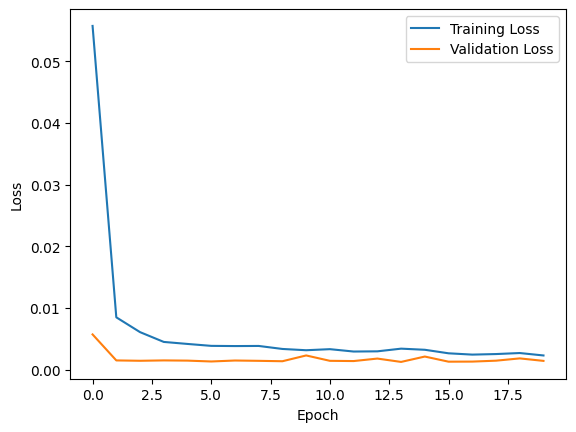

In [113]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


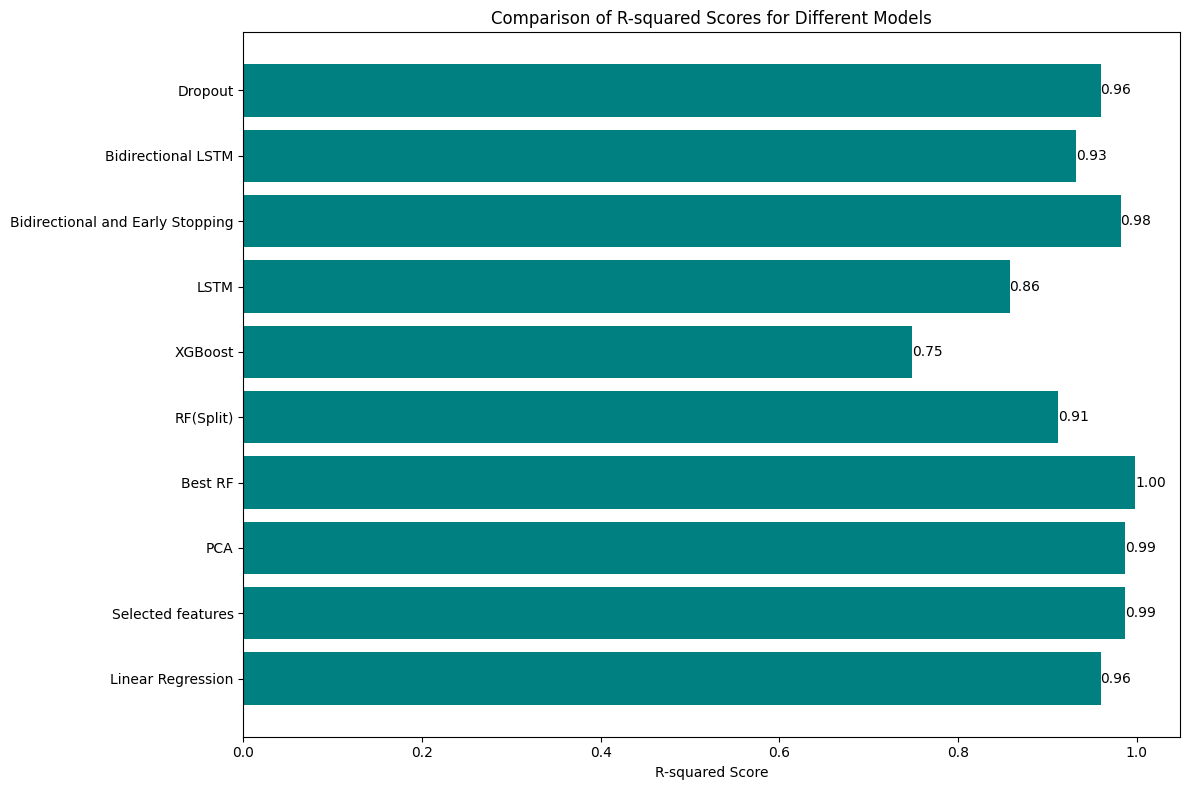

In [122]:
import matplotlib.pyplot as plt

# Your R-squared values
r2_values = {
    'Linear Regression': lr_r2,
    'Selected features': r2_selected,
    'PCA': pca_r2,
    'Best RF': best_r2,
    'RF(Split)': rf_r2,
    'XGBoost': xgb_r2,
    'LSTM': lstm_r2,
    'Bidirectional and Early Stopping': bwd_r2,
    'Bidirectional LSTM': bi_r2,
    'Dropout': r2
}

# Extract data for plotting
models = list(r2_values.keys())
scores = list(r2_values.values())

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(models, scores, color='teal')

# Add labels and title
plt.xlabel('R-squared Score')
plt.title('Comparison of R-squared Scores for Different Models')

# Add value labels next to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}',
             va='center', ha='left')

# Display the plot
plt.tight_layout()
plt.show()


In [124]:
# R-squared scores for each model
r2_scores = {
    'Linear Regression': lr_r2,
    'Selected Features': r2_selected,
    'PCA': pca_r2,
    'Best RF': best_r2,
    'RF (Split)': rf_r2,
    'XGBoost': xgb_r2,
    'LSTM': lstm_r2,
    'Bidirectional and Early Stopping': bwd_r2,
    'Bidirectional LSTM': bi_r2,
    'Dropout': r2
}

# Print the R-squared scores
print("R-squared Scores for Each Model:")
for model, score in r2_scores.items():
    print(f"{model}: {score:.4f}")



R-squared Scores for Each Model:
Linear Regression: 0.9594
Selected Features: 0.9864
PCA: 0.9864
Best RF: 0.9983
RF (Split): 0.9114
XGBoost: 0.7486
LSTM: 0.8576
Bidirectional and Early Stopping: 0.9818
Bidirectional LSTM: 0.9320
Dropout: 0.9594


[*********************100%***********************]  1 of 1 completed


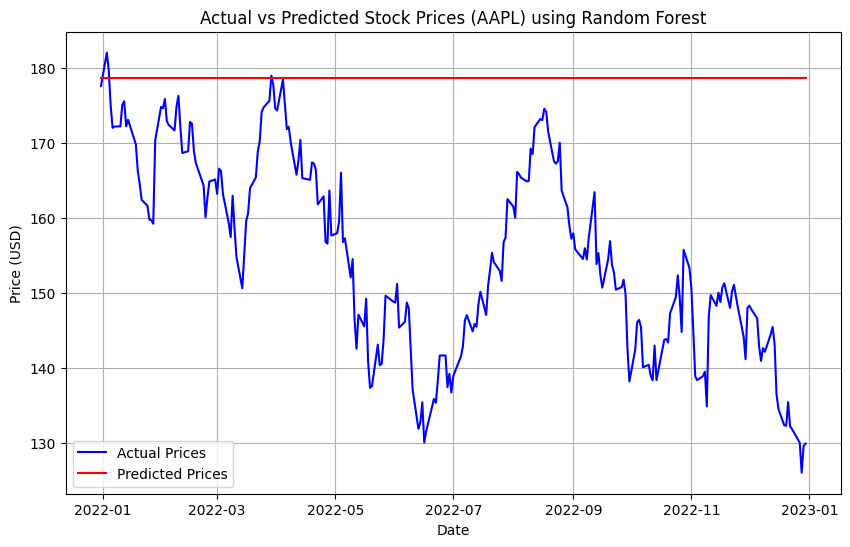

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Fetch historical data for Apple Inc. (AAPL)
data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')

# Preprocessing the data
data['Date'] = data.index
data['Price'] = data['Close']
data = data[['Date', 'Price']]

# Preparing training and test sets
X = np.arange(len(data)).reshape(-1, 1)  # Using the date index as feature
y = data['Price'].values

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Using Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting the stock prices
y_pred = model.predict(X_test)

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(data['Date'].iloc[len(X_train):], y_test, label='Actual Prices', color='blue')
plt.plot(data['Date'].iloc[len(X_train):], y_pred, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Actual vs Predicted Stock Prices (AAPL) using Random Forest')
plt.legend()
plt.grid(True)
plt.show()
